In [4]:
from scipy.io import loadmat
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
import random
import os


In [5]:
annots = loadmat('Xtrain.mat')
traindata=annots['Xtrain']
traindata=np.concatenate(traindata, axis=0 )
annots = loadmat('Xtest.mat')
testdata=annots['Xtest']
testdata=np.concatenate(testdata, axis=0 )


In [6]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(traindata.reshape(-1, 1))
scaled_data_test = scaler.fit_transform(testdata.reshape(-1, 1))

In [2]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

In [7]:
n_steps = 20
X, y = create_sequences(scaled_data, n_steps)
X_test,y_test=create_sequences(scaled_data_test, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [36]:
def set_seed(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [32]:
from keras.layers import LSTM, Dense, Dropout
from keras import regularizers
from tensorflow.keras import Input
# set_seed(42)
model = Sequential([
       Input(shape=(n_steps, 1)),
    LSTM(64, activation='relu',
 
               return_sequences=False, 
            #    kernel_regularizer=regularizers.l2(0.001)
               )
])
# model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history=model.fit(X, y, epochs=500, validation_split=0.2,verbose=0)
# model.save('modelstep3.h5')

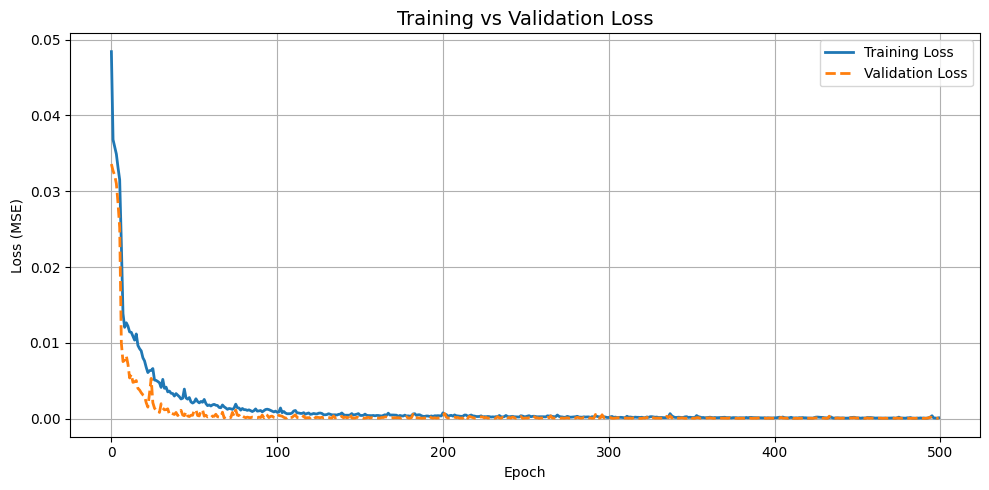

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, linestyle='--')
plt.title('Training vs Validation Loss', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
# model.load_weights('modelstep5.h5')
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_true_rescaled = scaler.inverse_transform(y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [35]:
y_true_rescaled.flatten()

array([ 12.,   9.,  17.,  60., 182., 143.,  38.,  13.,   9.,   9.,  19.,
        71., 201., 126.,  30.,  12.,   9.,   8.,  18.,  70., 211., 131.,
        30.,  11.,   8.,   8.,  13.,  47., 192., 179.,  40.,  13.,   9.,
         7.,   7.,  14.,  71., 255., 131.,  24.,   9.,   7.,   7.,   5.,
         4.,   3.,   8.,  20.,  13.,  10.,  13.,  20.,  31.,  42.,  57.,
        68.,  70.,  59.,  48.,  46.,  51.,  61.,  70.,  67.,  57.,  48.,
        47.,  53.,  65.,  72.,  67.,  57.,  47.,  47.,  54.,  67.,  73.,
        66.,  54.,  48.,  47.,  55.,  68.,  74.,  65.,  54.,  46.,  48.,
        57.,  70.,  75.,  65.,  52.,  45.,  47.,  58.,  72.,  74.,  64.,
        50.,  44.,  47.,  60.,  74.,  76.,  63.,  48.,  44.,  48.,  61.,
        77.,  77.,  61.,  48.,  43.,  48.,  64.,  79.,  77.,  60.,  47.,
        42.,  49.,  67.,  82.,  77.,  58.,  45.,  42.,  51.,  69.,  84.,
        77.,  56.,  43.,  42.,  52.,  72.,  86.,  77.,  56.,  42.,  42.,
        54.,  74.,  88.,  76.,  54.,  41.,  42.,  5

In [36]:
y_pred_rescaled.flatten()

array([ 11.144476 ,  13.0170145,  16.384228 ,  63.89161  , 192.81631  ,
       146.96178  ,  40.135635 ,  14.502078 ,   9.040302 ,  11.039421 ,
        20.696175 ,  79.58616  , 206.41927  , 129.49825  ,  33.188473 ,
        11.271336 ,   9.128413 ,  11.683525 ,  19.546606 ,  80.28356  ,
       215.04796  , 131.1695   ,  31.578812 ,  11.349062 ,   7.517148 ,
         9.043064 ,  19.50805  ,  55.99821  , 192.32774  , 180.29167  ,
        42.42318  ,  12.540914 ,   7.744938 ,   8.415275 ,  10.993172 ,
        23.545162 ,  79.02337  , 249.43265  , 130.49712  ,  22.413622 ,
        10.417861 ,   4.7134156,   5.048586 ,  16.681128 ,  14.991936 ,
         8.713448 ,   3.708709 ,  24.804535 ,  -2.4612687,   5.2047133,
        10.629269 ,  16.922287 ,  31.48691  ,  46.038616 ,  53.433075 ,
        57.5222   ,  55.73353  ,  54.00123  ,  48.126167 ,  42.75142  ,
        45.85633  ,  54.434883 ,  67.00275  ,  71.79088  ,  60.195282 ,
        49.453346 ,  46.233253 ,  52.97225  ,  64.294365 ,  73.4

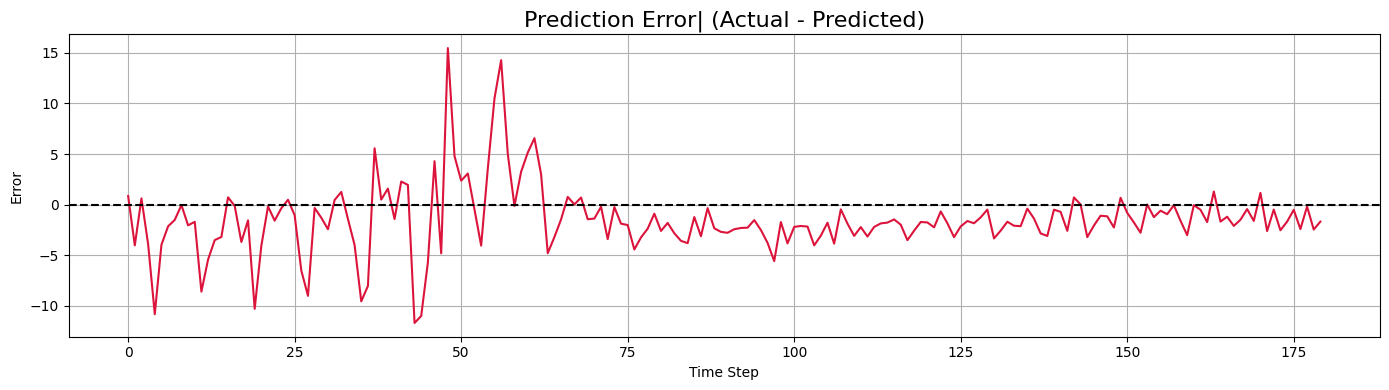

In [37]:
error = y_true_rescaled.flatten() - y_pred_rescaled.flatten()

plt.figure(figsize=(14, 4))
plt.plot(error, color='crimson')
plt.title('Prediction Error| (Actual - Predicted)', fontsize=16)
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Flatten arrays
y_true = y_true_rescaled.flatten()
y_pred = y_pred_rescaled.flatten()

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Print results
print(f"Evaluation Metrics:")
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

Evaluation Metrics:
MAE  = 2.6516
MSE  = 13.5513
RMSE = 3.6812
R²   = 0.9905


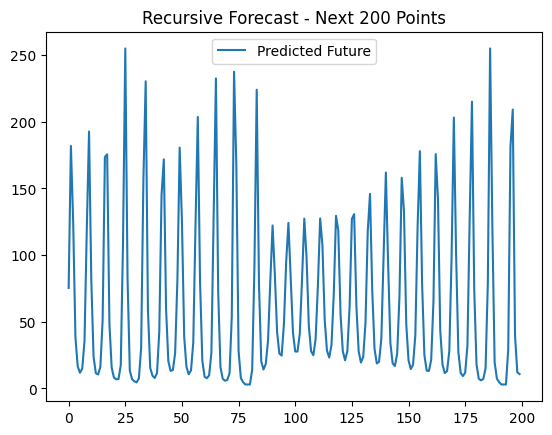

In [39]:
predicted = []
last_input = scaled_data[-n_steps:].reshape(1, n_steps, 1)
data_min, data_max = scaled_data.min(), scaled_data.max()
for _ in range(200):
    next_val = model.predict(last_input, verbose=0)
    next_val = np.clip(next_val, data_min, data_max)
    predicted.append(next_val[0][0])
    
    last_input = np.concatenate([last_input[:, 1:, :], next_val.reshape(1, 1, 1)], axis=1)

predicted_rescaled = scaler.inverse_transform(np.array(predicted).reshape(-1, 1))
totalList=np.append(scaled_data,predicted_rescaled)

plt.plot(predicted_rescaled, label='Predicted Future')
plt.title("Recursive Forecast - Next 200 Points")
plt.legend()
plt.show()

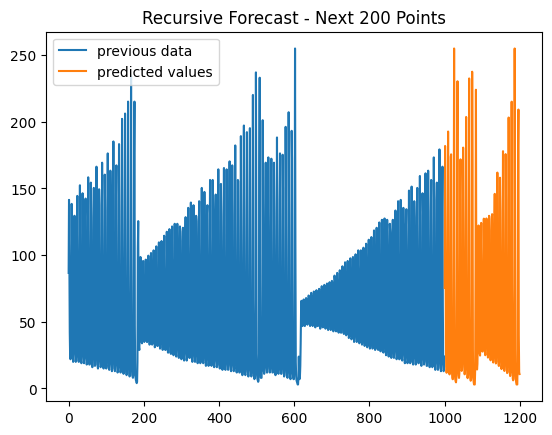

In [40]:
# Plot the future predictions

prviousdata_rescaled = scaler.inverse_transform(scaled_data)
# totalList=np.append(data_rescaled,predicted_rescaled)
# prevous
plt.plot(range(len(prviousdata_rescaled)),prviousdata_rescaled, label='previous data')
plt.plot(range(len(prviousdata_rescaled),len(prviousdata_rescaled)+len(predicted_rescaled)),predicted_rescaled,label = 'predicted values')
plt.title("Recursive Forecast - Next 200 Points")
plt.legend()
plt.show()

Evaluating n_steps = 3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Evaluating n_steps = 5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
Evaluating n_steps = 7
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Evaluating n_steps = 10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Evaluating n_steps = 15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
6/6 ━━━━━

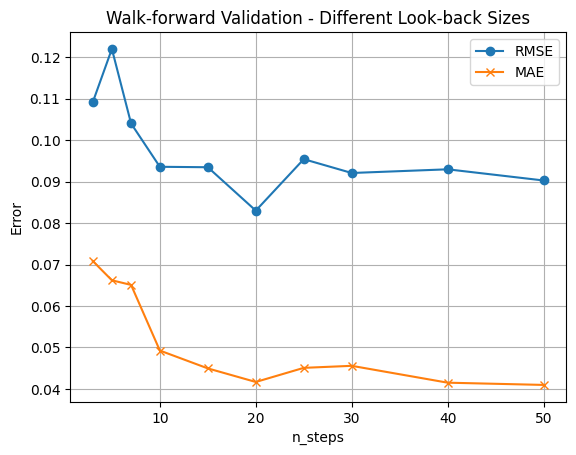

In [41]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Set global seed
def set_seed(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

# Model builder
def build_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(64),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

def walk_forward_validate(data, test_data, n_steps, n_splits=5, seed_start=100):
    rmse_list, mae_list = [], []

    for fold in range(n_splits):
        set_seed(seed_start + fold)

        X_train, y_train = create_sequences(data, n_steps)
        X_test, y_test = create_sequences(test_data, n_steps)

        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

        model = build_model((n_steps, 1))
        model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

        # Predict and evaluate
        preds = model.predict(X_test, verbose=0).flatten()
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        mae = mean_absolute_error(y_test, preds)

        rmse_list.append(rmse)
        mae_list.append(mae)

    return np.mean(rmse_list), np.mean(mae_list)

# Evaluation loop for different n_steps
def evaluate_n_steps(data, test_data, n_steps_list):
    results = []
    for n in n_steps_list:
        print(f"Evaluating n_steps = {n}")
        rmse, mae = walk_forward_validate(data, test_data, n_steps=n)
        results.append((n, rmse, mae))
    return results

# Example usage:
n_steps_list = [3, 5, 7, 10, 15, 20, 25, 30, 40, 50]
results = evaluate_n_steps(scaled_data, scaled_data_test, n_steps_list)

# Plotting results
n_vals = [r[0] for r in results]
rmse_vals = [r[1] for r in results]
mae_vals = [r[2] for r in results]

plt.figure(figsize=(10, 6))
plt.plot(n_vals, rmse_vals, marker='o', label='RMSE')
plt.plot(n_vals, mae_vals, marker='x', label='MAE')
plt.xlabel("n_steps (Look-back Window)")
plt.ylabel("Error")
plt.title("Walk-forward Validation - Different Look-back Sizes")
plt.legend()
plt.grid(True)
plt.show()


In [42]:
print(rmse_vals)
print(mae_vals)

[np.float64(0.10909402457855925), np.float64(0.1220009966120164), np.float64(0.10401712760024925), np.float64(0.09357199852141959), np.float64(0.0934624918894574), np.float64(0.08299791463458682), np.float64(0.09541016246370422), np.float64(0.09207544588935769), np.float64(0.09296241437500267), np.float64(0.09026806362485944)]
[np.float64(0.07086037432545429), np.float64(0.06619279749212367), np.float64(0.06508147599605581), np.float64(0.04924547593772984), np.float64(0.0449436008699753), np.float64(0.04166839881952873), np.float64(0.04507578954303345), np.float64(0.045563168050486505), np.float64(0.04149754668201601), np.float64(0.04095771521381127)]


In [43]:
best_idx = np.argmin(rmse_vals)
print(f"Best n_steps: {n_vals[best_idx]} with RMSE = {rmse_vals[best_idx]:.4f}")

Best n_steps: 20 with RMSE = 0.0830


In [44]:
best_idx = np.argmin(mae_vals)
print(f"Best n_steps: {n_vals[best_idx]} with RMSE = {mae_vals[best_idx]:.4f}")

Best n_steps: 50 with RMSE = 0.0410
